# Time propagation: an introduction

After the strength function, the time propagation of an initial wavepacket is another example of how relevant the Siegert states can be in order to reproduce quantities of physical interest.

The exact time propagation of an initial wavepacket $f$ using the bound and continuum states is given by:

$f_{exact}(x, t) = \sum_b \left\langle \varphi_b | f \right\rangle \varphi_b(x) e^{- i E_b t} + 
                   \sum_{p=\pm} \int_0^\infty \text{d} k \left\langle \varphi_p | f \right\rangle \varphi_p(x) e^{- i E(k) t}$

It will be compared to a Siegert states expansion of this time-propagation:

$f_{S}(x, t) = \sum_{S=?} \alpha_S \left( \varphi_b | f \right\rangle \varphi_b(x) e^{- i E_S t}$

where the important part is the value of the weight $\alpha_S$: it will be shown later that the exact Siegert states expansion has a precise definition for these weights that does not correspond to the Mittag-Leffler Expansion (for which each state is counted with a 1/2 weight) except for the initial time $t=0$. 

The test function $f$ may be a rectangular or a Gaussian function. We will focus on the latter type of test function, since the completeness relation is more easily fulfilled for this type of test function, and this influences greatly the quality of the time-propagation (both for exact and Siegert states expansions, since this reduces the wavenumber (or energy) range of the states used for the time propagation).

This comparison is performed in the case of the 1D Square-Well Potential (1DSWP), where the continuum and Siegert states are known analytically.

## Initialization

Before actually performing the time propagation of an initial wavepacket, some initial actions must be performed, to define the potential and basis sets made of the corresponding eigenstates. The main difference here is that the eigenstates must be discretized over a space grid in order for the time propagation of a wavepacket to be performed.

### Import some modules and classes

This does not require any different module imports: no surprise there

In [1]:
# Make the notebook aware of some of the SiegPy module classes
from siegpy import Gaussian, SWPBasisSet
# Other imports
import numpy as np
import matplotlib.pyplot as plt

### Define a 1D Square-Well Potential and create a basis set made of Siegert states only

To save computation time, the potential and the basis set of Siegert states are read from the file `siegerts.dat`. This is still not different from some previous notebooks.

In [2]:
# Read the Siegert states from a data file
siegerts = SWPBasisSet.from_file('siegerts.dat', nres=25)

# Define the potential
potential = siegerts[0].potential

The difference actually comes from the need to discretize the each eigenstate over a grid (remember the equations in the introduction: they require $\varphi_p(x)$ and $\varphi_S(x)$). 

Given that:

- the Siegert states expansion is supposed to be valid in region $II$ ($|x| \leq l/2$),

- the scalar products between Siegert states and the initial wavepacket are still computed analytically (each state has the attribute `analytic` set to `True`),

there is no need to use a large, dense grid: it need only be dense enough for plotting.

In [3]:
# Discretize the Siegert states over a space grid in region II:
l = potential.width
xgrid = np.linspace(-l/2, l/2, 201)
siegerts.grid = xgrid

In the case you do not have access to a previous data file, the commands are similar, but in a different order:
```
# You also need to import the SWPotential class
import SWPBasisSet, SWPPotential
# Define a potential
potential = SWPotential(5, 10)
# Create a grid
l = potential.width
xgrid = np.linspace(-l/2, l/2, 201)
# Create the basis set with the grid
siegerts = SWPBasisSet.find_Siegert_states(potential, 10, 1, 3, grid=xgrid)
```

If the data file contains eigenstates that are already discretized, it is even simpler:
```
# You don't need to import the SWPotential class
import SWPBasisSet
# Read the Siegert states from a data file
siegerts = SWPBasisSet.from_file('siegerts.dat')
```

### Create an exact basis set

The exact basis set is made of the bound and continuum states of the system. The bound states of the `siegerts` basis set may readily be reused, while a grid of continuum states still has to be computed. This is done using the `find_continuum` method of the potential (do not forget to discretize them over a grid by specifying the `grid` optional parameter):

In [4]:
# Find the continuum states of the potential
h_k = 0.05
k_max = 20
cont = SWPBasisSet.find_continuum_states(potential, k_max, h_k, grid=xgrid)

# Make the exact basis set
exact = cont + siegerts.bounds

### Define a test function

The test function $f$ is a Gaussian that must mostly spread in region $II$ (inside the potential, where $|x| \leq l/2$). We start with a centered Gaussian.

In [5]:
sigma = l/20. # width of the Gaussian
x_c = 0.0     # center of the Gaussian
gauss = Gaussian(sigma, x_c, grid=xgrid)

## Exact and Mittag-Leffler expansion of the time propagation of a Gaussian wavepacket

To perform the time propagation, the `time_grid` parameter is the last one to define. It should be a list or a numpy array containing the times for which the propagated wavepacket is evaluated. Note that all the times in `time_grid` must be positive (if not, all times are translated so that they all are positive).

### Computation

The exact time propagation of the Gaussian wavepacket is computed by applying the `exact_propagation` method to the exact basis set. The Mittag-Leffler expansion of this time propagation is computed by applying the `MLE_propagation` method to the Siegert states basis set.

In [6]:
# Definition of the time grid
time_grid = [0.0, 0.05, 0.1, 0.15, 0.3, 0.4, 0.5, 0.6, 0.7, 1.0, 1.5]

# Evaluation of the exact time propagation
exact_tp = exact.exact_propagation(gauss, time_grid)

# Evaluation of the Mittag-Leffler expansion of the time propagation
MLE_tp = siegerts.MLE_propagation(gauss, time_grid)

**Note:**

Rather than using the exact basis set `exact` defined above, the `exact_propagation` method may be applied to the basis set `siegerts`, since the continuum states may be created by this method, provided that values for the optional parameters `hk` (for the wavenumber grid step) and `kmax` (for the wavenumber range) are given:

```
# Evaluation of the exact time propagation, creating the continuum states in place
exact_tp = siegerts.exact_propagation(gauss, time_grid, kmax=k_max, hk=h_k)
```

### Plotting

The results of the `exact_propagation` and `MLE_propagation` methods are arrays of wavepackets $f(x, t)$, evaluated at the different times $t$ in `time_grid`. We can compare both results for each time:

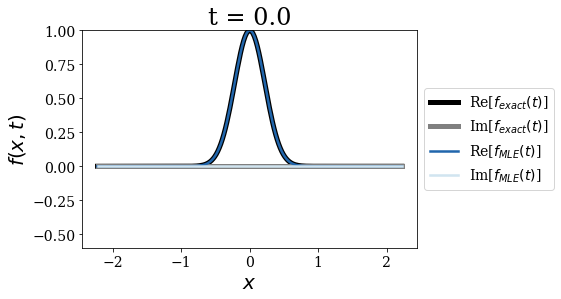

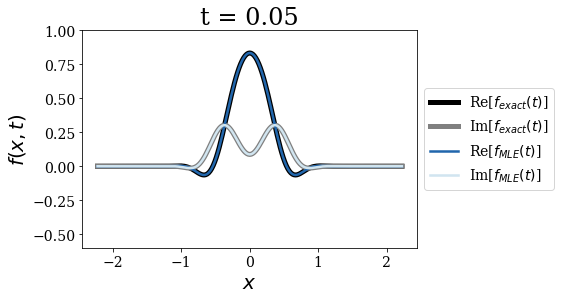

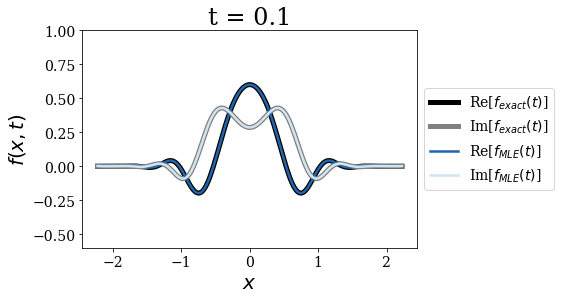

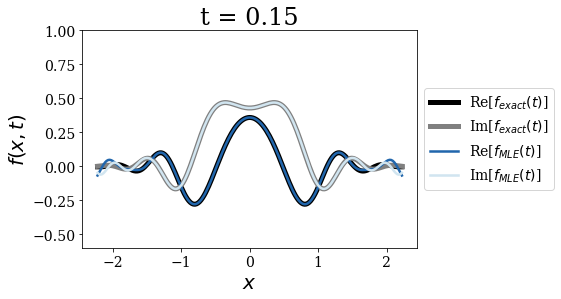

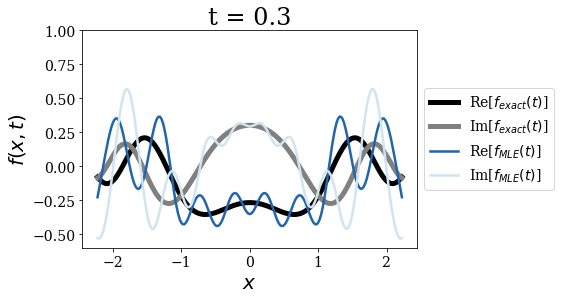

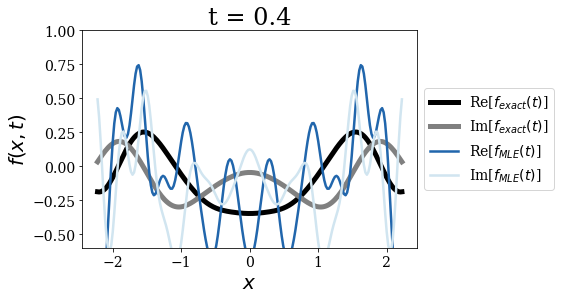

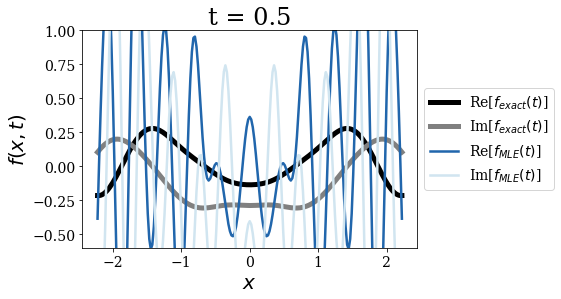

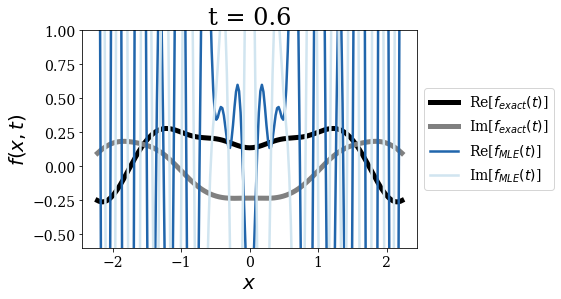

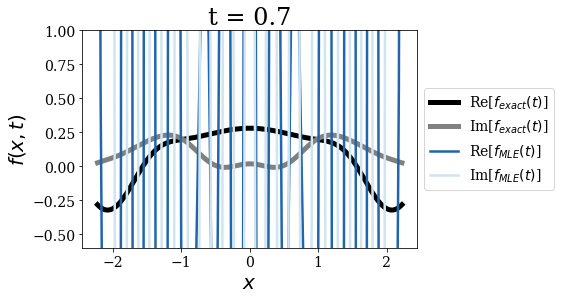

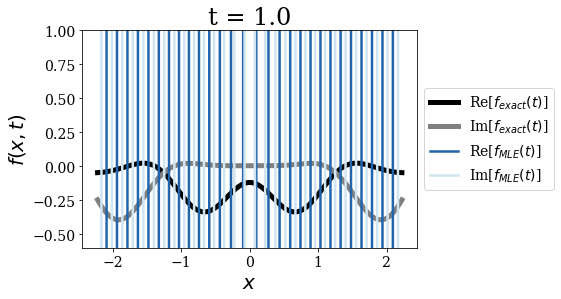

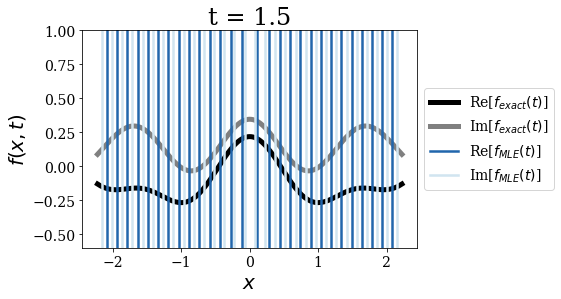

In [7]:
h = gauss.amplitude
k0 = gauss.momentum
for i, t in enumerate(time_grid):
    plt.ylim(-0.6, 1.0)
    plt.title("t = {}".format(t))
    plt.plot(xgrid, np.real(exact_tp[i]), color='k', label='Re[$f_{exact}(t)$]', lw=5)
    plt.plot(xgrid, np.imag(exact_tp[i]), color='grey', label='Im[$f_{exact}(t)$]', lw=5)
    plt.plot(xgrid, np.real(MLE_tp[i]), color='#2166ac', label='Re[$f_{MLE}(t)$]')
    plt.plot(xgrid, np.imag(MLE_tp[i]), color='#d1e5f0', label='Im[$f_{MLE}(t)$]')
    # plt.plot(gauss.grid, np.real(gauss.wf), color='k')
    plt.xlabel("$x$")
    plt.ylabel("$f(x, t)$")
    plt.legend(loc=6, bbox_to_anchor=(1, 0.5))
    plt.show()

While the Mittag-Leffler expansion seems to reproduce exactly the time propagation for short times, it starts diverging from the exact results as soon as the propagated wavepacket is reaching the border of region $II$. Both regimes can be understood:

* We know that the MLE of the initial Gaussian wavepacket is correct, since the completeness relation for this test function is fulfilled. This is why the Gaussian test function is well reproduced for $t = 0$. Furthermore, the MLE is supposed to hold while the test function is in region $II$. This is the reason why the MLE is valid for short times.

* From the second formula of the introduction, it is inferred that the MLE of the time propagation of a wavepacket **must** diverge for long positive times because of the anti-resonant states contribution: the exponential term $e^{-i E_S t}$ diverges because of the positive imaginary part of the anti-resonant states energies. Note that the resonant states contribution would make the MLE of the time propagation diverge for long negative times.

## Another type of expansion: the Berggren Expansion

The Mittag-Leffler, however giving correct results for short times, cannot be the correct Siegert states expansion: another expansion must be found. The so-called Berggren expansion (which is discussed in the literature, *e.g.* [1](http://www.sciencedirect.com/science/article/pii/0375947468905939), [2](http://link.springer.com/10.1007/BF01289789)) may be a good candidate: it requires the use of the bound and resonant states only (all counted with a weight 1, compared to the 1/2 weight of the MLE). The anti-resonant states divergence for large positive times disappears *de facto*.

This expansion can be applied to the Siegert states basis set via the `Berggren_propagation` method, using the same time grid and Gaussian test function:

In [8]:
# Evaluation of the Berggren expansion of the time propagation
Ber_tp = siegerts.Berggren_propagation(gauss, time_grid)

The result of this expansion is then compared to the exact time propagation:

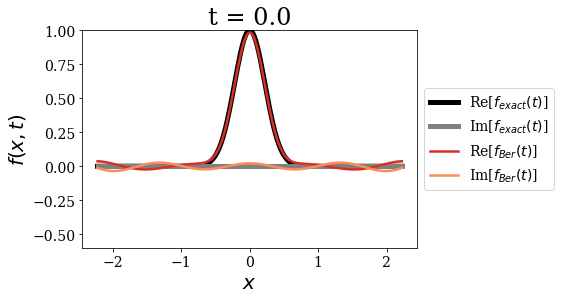

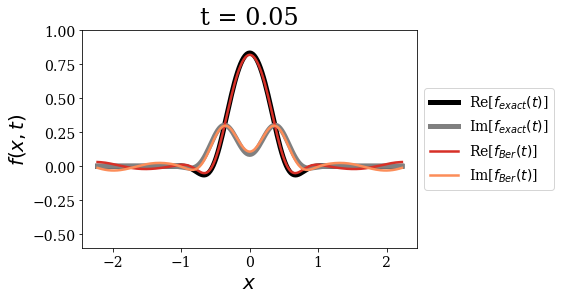

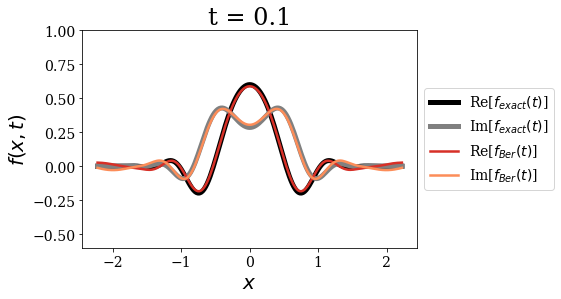

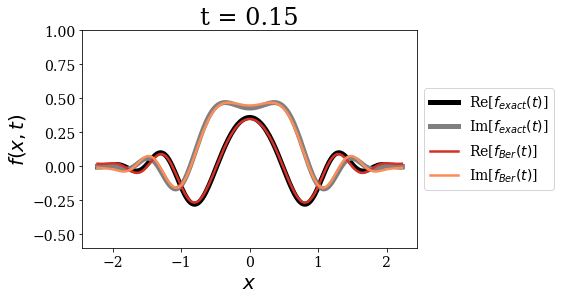

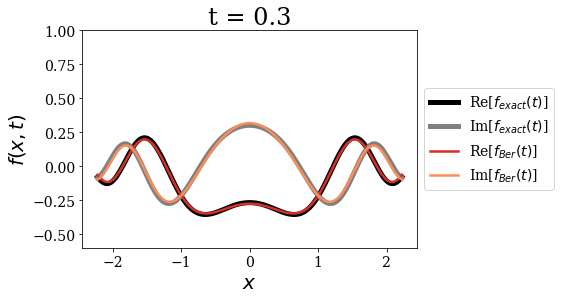

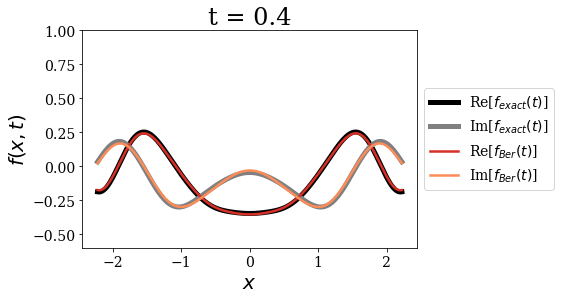

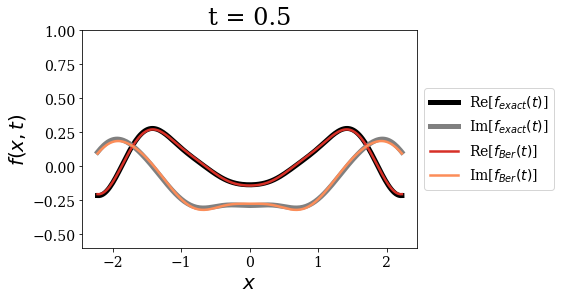

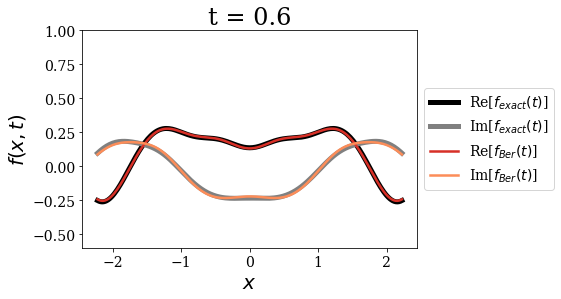

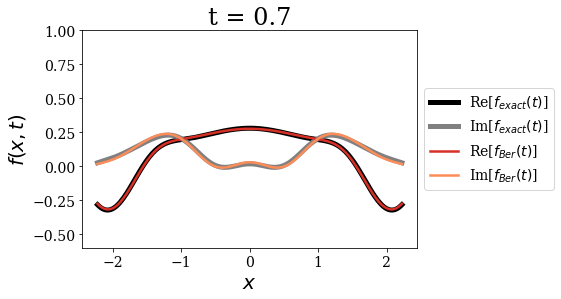

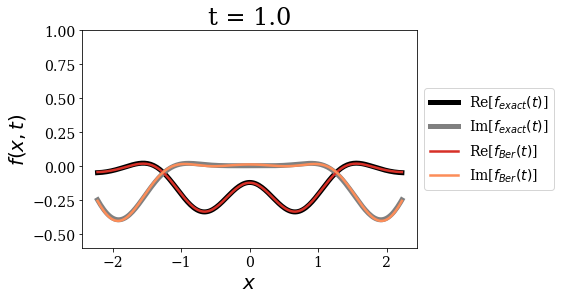

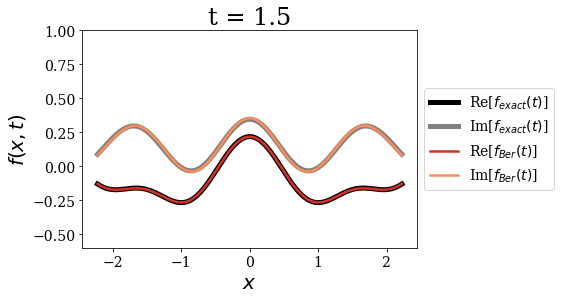

In [9]:
for i, t in enumerate(time_grid):
    plt.ylim(-0.6, 1.0)
    plt.title("t = {}".format(t))
    plt.plot(xgrid, np.real(exact_tp[i]), color='k', label='Re[$f_{exact}(t)$]', lw=5)
    plt.plot(xgrid, np.imag(exact_tp[i]), color='grey', label='Im[$f_{exact}(t)$]', lw=5)
    plt.plot(xgrid, np.real(Ber_tp[i]), color='#d73027', label='Re[$f_{Ber}(t)$]')
    plt.plot(xgrid, np.imag(Ber_tp[i]), color='#fc8d59', label='Im[$f_{Ber}(t)$]')
    #plt.plot(gauss.grid, np.real(gauss.wf), color='k')
    plt.xlabel("$x$")
    plt.ylabel("$f(x, t)$")
    plt.legend(loc=6, bbox_to_anchor=(1, 0.5))
    plt.show()

**In the short time limit, this expansion is not as good as the Mittag-Leffler expansion.** This is particularly evidenced at $t=0$: the initial Gaussian wavepacket is complex if the Berggren expansion is used. This proves that the Berggren expansion is not the natural Siegert states expansion, while the Mittag-Leffler expansion is. For the latter, the imaginary part of the resonant and anti-resonant states contribution are the opposite, and their sum is therefore equal to zero. The Berggren expansion lacks this anti-resonant states expansion for short times. 

**However, and as expected, the Berggren expansion does not diverge for large times. The agreement with the exact time propagation is even very good for larger times.**

This is actually expected: the resonant states contributions to the time propagation tend to 0 for large times (due to the negative imaginary part of their energies), and this is also true for the continuum states (this is known as the RAGE theorem in the mathematical community). The agreement for very long time is therefore expected, since only the bound states contributions remain.

Still, the Berggren expansion is very satisfactory for an intermediate time range, when the continuum states contributions are still relatively high compared to the bound states contributions. **There might be a transition between the Mittag-Leffler regime and the Berggren regime.**

## Exact Siegert expansion
We found which expansion should hold in two limits (short and long time), and a transition from a Mittag-Leffler expansion to a Berggren expansion is expected. This transition was explained in [Santra et al., PRA 71 (2005)](http://link.aps.org/doi/10.1103/PhysRevA.71.032703). To achieve that, the authors analytically derived the correct weights for the Siegert states (the $\alpha_S$ in the second equation in the introduction of this notebook). Such weights are time-dependent and also depend on the Siegert state (see eq. 69 of this paper). This exact Siegert states expansion exactly amount to the Mittag-Leffler for the initial time $t=0$ and is somehow related to the Berggren expansion for $t \neq 0$, since only the bound and resonant states have an exponential decay.

This exact Siegert states propagation is therefore implemented in SiegPy. It can be called directly by the `exact_Siegert_propagation` method of a `SWPBasisSet` instance:

In [10]:
exact_S_tp = siegerts.exact_Siegert_propagation(gauss, time_grid)

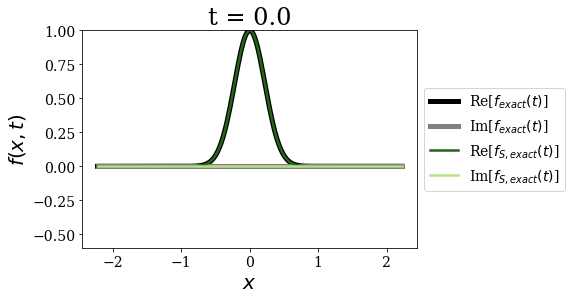

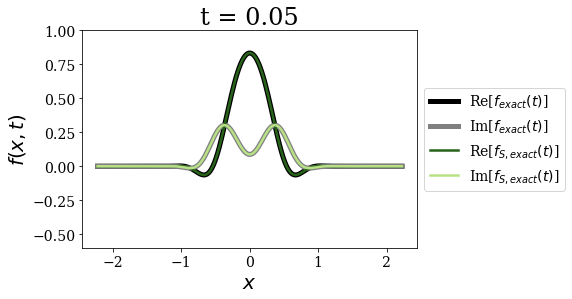

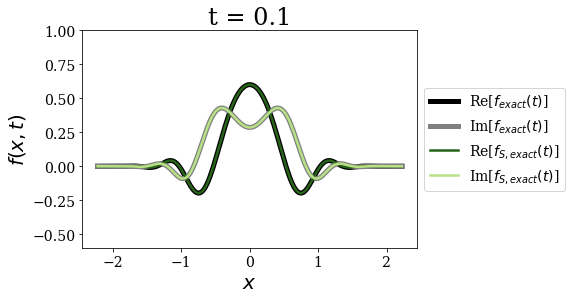

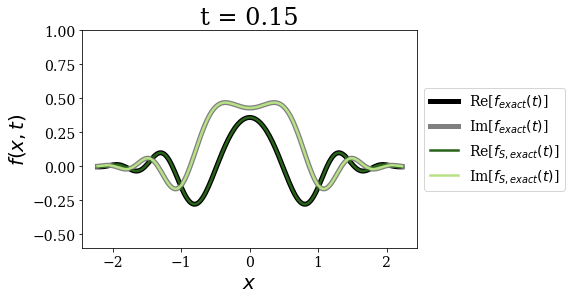

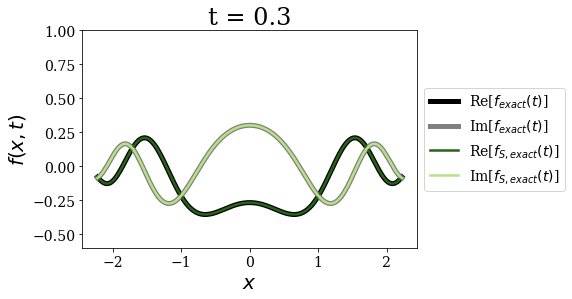

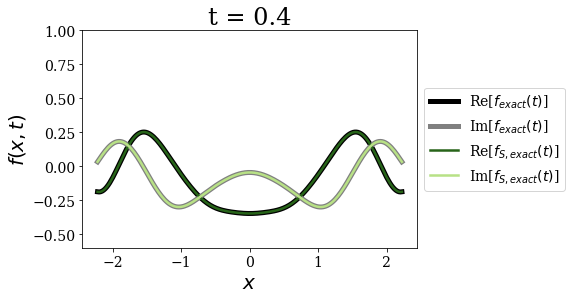

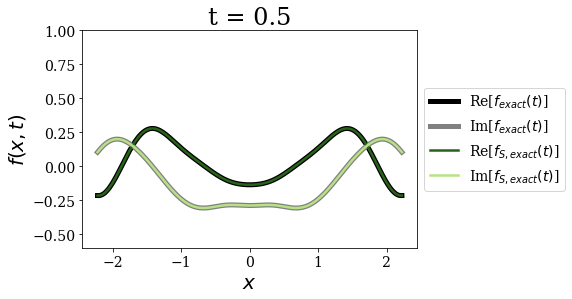

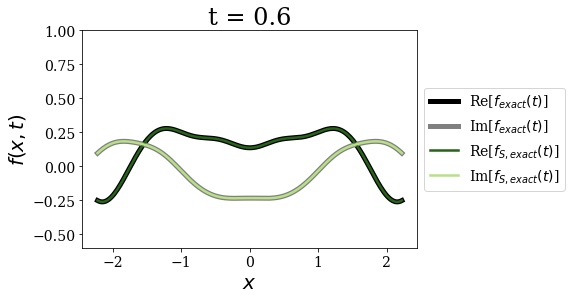

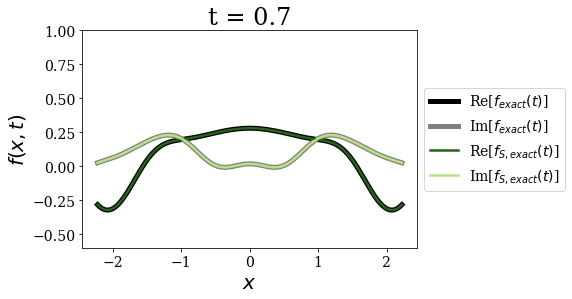

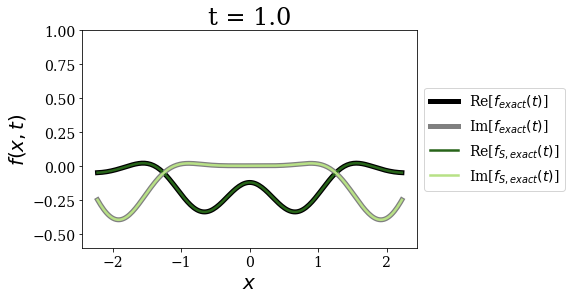

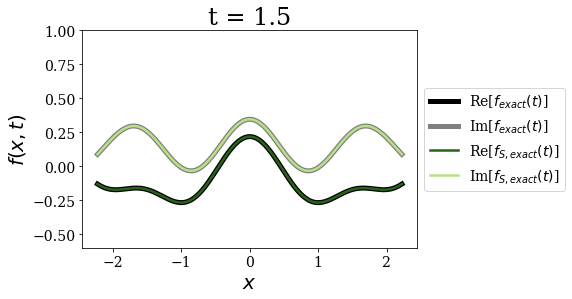

In [11]:
for i, t in enumerate(time_grid):
    plt.ylim(-0.6, 1.0)
    plt.title("t = {}".format(t))
    plt.plot(xgrid, np.real(exact_tp[i]), color='k', label='Re[$f_{exact}(t)$]', lw=5)
    plt.plot(xgrid, np.imag(exact_tp[i]), color='grey', label='Im[$f_{exact}(t)$]', lw=5)
    plt.plot(xgrid, np.real(exact_S_tp[i]), color='#276419', label='Re[$f_{S, exact}(t)$]')
    plt.plot(xgrid, np.imag(exact_S_tp[i]), color='#b8e186', label='Im[$f_{S, exact}(t)$]')
    #plt.plot(gauss.grid, np.real(gauss.wf), color='k')
    plt.xlabel("$x$")
    plt.ylabel("$f(x, t)$")
    plt.legend(loc=6, bbox_to_anchor=(1, 0.5))
    plt.show()

As expected, the exact Siegert states expansion gives results that are in excellent agreement with the exact time propagation using the bound and continuum states. This agreement is valid for any time considered (if the exact basis set is dense enough, see the `convergence_exact_time_propagation` notebook).

**Notes:**

**1-** Even though the `MLE_propagation` or `Berggren_expansion` methods should be preferred, the `Siegert_propagation` method actually allows to reproduce their results by specifying a value to the optional parameter `weights`:

```
# MLE expansion
MLE_weights = {'b': 1/2, 'ab': 1/2, 'r': 1/2, 'ar': 1/2}
MLE_tp = siegerts.Siegert_propagation(gauss, time_grid, 
                                      weights=MLE_weights)

# Berggren expansion
Ber_weights = {'b': 1, 'r': 1}
Ber_tp = siegerts.Siegert_propagation(gauss, time_grid,
                                      weights=Ber_weights)
```

Using the `Siegert_propagation` method in this manner allows to define another Siegert state expansion, or to isolate the contribution of a particular type of Siegert states to the time-propagation without creating another basis set.


**2-** In order to get the plots, you can also use the ```plot_propagation``` method. Its parameters are the test function and the time_grid. Its optional arguments `exact` and `exact_Siegert` are set to `True` by default, meaning that both exact expansions will be plotted. This means you can plot one or None of those expansions by setting one or both of these arguments to `False`. Two other optional arguments, `MLE` and `Berggren`, are set to `False` by default. The MLE and the Berggren expansions can also be plotted if these arguments are set to `True`, respectively. 

Here are some use cases, allowing to reproduce the three series of plots presented above in a more concise manner:
```
# Limit the y-axis range of the plots
my_ylim=(-0.6, 1.0)
# Plot the exact result and the MLE
siegerts.plot_propagation(gauss, time_grid, exact_Siegert=False, MLE=True, ylim=my_ylim)
# Plot the exact result and the Berggren expansion
siegerts.plot_propagation(gauss, time_grid, exact_Siegert=False, Berggren=True, ylim=my_ylim)
# Plot both exact expansions
siegerts.plot_propagation(gauss, time_grid, ylim=my_ylim)
```

Note that it is not mandatory to have continuum states in the basis set when plotting the exact expansion, since they can be quickly created on-the-fly (see the note in the exact and MLE section of this notebook). The above example would actually compute three times the same continuum basis set and its contributions to the time-propagation (it is not a problem because these computations being inexpensive; the gain in concision is well worth the computation repetition).

## Conclusion

You should now be able to perform the most important Siegert states expansion of the time propagation of a wavepacket, and also to compare them to the exact result using the bound and continuum states.

You saw that:

- there is an exact Siegert states expansion that is not the Mittag-Leffler expansion,

- it however is the same as the Mittag-Leffler expansion for the initial time $t=0$,

- it is somehow related to the Berggren expansion for $t \neq 0$.